In [4]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

FileNotFoundError: ignored

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/MMAFEDB/train',
                                                 target_size = (48, 48),
                                                 batch_size = 32,
                                                 color_mode='grayscale',
                                                 class_mode = 'categorical')
#Processing picture: 48*48 size, the number of samples processed in each training is 32, the picture becomes a grayscale mode
test_set = test_datagen.flow_from_directory('/content/MMAFEDB/test',
                                            target_size = (48, 48),
                                            batch_size = 32,
                                            color_mode='grayscale',
                                            class_mode = 'categorical')

Found 92968 images belonging to 7 classes.
Found 17356 images belonging to 7 classes.


In [14]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
    #64 convolution kernels, the size is 3*3, the style remains unchanged, the activation function adopts relu, the input image size is 48*48, single channel
    model.add(MaxPool2D(pool_size=2,strides=2))
    #First pooling
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=2,strides=2))
    #Second pooling
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=2,strides=2))
    #Third pooling
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=2,strides=2))
    ##Fourth pooling
    model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
    model.add(MaxPool2D(pool_size=2,strides=2))
    #Fifth pooling
    model.add(Flatten())
    #After three fully connected layers
    model.add(Dense(units=128,activation='relu',kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(units= 64,activation='relu',kernel_initializer='he_normal'))
    model.add(Dropout(0.25))
    model.add(Dense(units= 32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(units=7,activation='softmax'))#Output layer, the activation function is softmax

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [ ]:
model = build_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)        

In [2]:
hist = model.fit(x=training_set,validation_data=test_set,epochs=60,batch_size=64)
#The model performs 60 iterations, and the number of samples processed each time is 64

NameError: ignored

In [1]:
 model.save('model_2.h5')

NameError: ignored

In [ ]:
opDict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

(48, 48)
(1, 48, 48)
6
Surprise


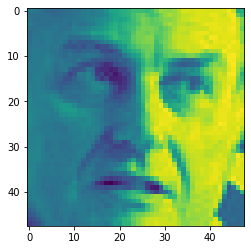

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img("/content/AI/test/sad/PrivateTest_10247676.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("./model_2.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()

In [ ]:
num_epochs = 10
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VAL   = test_set.n//test_set.batch_size

In [ ]:
from tensorflow.keras import models, layers, regularizers
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7
model_ann = Sequential()
model_ann.add(layers.Dense(32, input_shape=input_shape, activation='relu'))
model_ann.add(layers.Dropout(0.8))
model_ann.add(layers.Dense(64, activation='relu'))
model_ann.add(layers.Dropout(0.8))
model_ann.add(layers.Flatten())
model_ann.add(layers.Dense(7, activation='softmax'))

model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 48, 48, 32)        64        
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 dense_5 (Dense)             (None, 48, 48, 64)        2112      
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_6 (Dense)             (None, 7)                 1032199   
                                                                 
Total params: 1,034,375
Trainable params: 1,034,375
No

In [ ]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 64
history = model_ann.fit(x=training_set, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, batch_size=batch_size, validation_data=test_set, validation_steps=STEP_SIZE_VAL)
history

Epoch 1/10
897/897 [==============================] - 162s 179ms/step - loss: 0.3915 - accuracy: 0.2714 - val_loss: 0.4457 - val_accuracy: 0.2677
Epoch 2/10
897/897 [==============================] - 155s 173ms/step - loss: 0.3752 - accuracy: 0.3025 - val_loss: 0.4293 - val_accuracy: 0.3097
Epoch 3/10
897/897 [==============================] - 154s 172ms/step - loss: 0.3732 - accuracy: 0.3102 - val_loss: 0.4191 - val_accuracy: 0.3271
Epoch 4/10
897/897 [==============================] - 153s 171ms/step - loss: 0.3722 - accuracy: 0.3142 - val_loss: 0.4291 - val_accuracy: 0.3239
Epoch 5/10
897/897 [==============================] - 154s 171ms/step - loss: 0.3715 - accuracy: 0.3173 - val_loss: 0.4315 - val_accuracy: 0.3387
Epoch 6/10
897/897 [==============================] - 160s 179ms/step - loss: 0.3708 - accuracy: 0.3188 - val_loss: 0.4393 - val_accuracy: 0.3397
Epoch 7/10
897/897 [==============================] - 153s 171ms/step - loss: 0.3709 - accuracy: 0.3195 - val_loss: 0.4057 -

In [ ]:
models.save_model(model_ann, 'ANNmodelfinal.h5')


In [ ]:
ann_score = model_ann.evaluate_generator(test_set, steps=STEP_SIZE_VAL) 
print('Test loss: ', ann_score[0])
print('Test accuracy: ', ann_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss:  0.40641674399375916
Test accuracy:  0.3239397406578064


(48, 48)


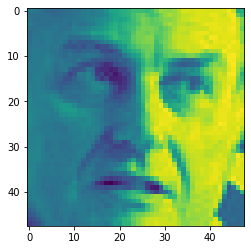

In [ ]:
#Test Part
from keras.preprocessing import image


img = image.load_img("/content/AI/test/sad/PrivateTest_10247676.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

(48, 48)
(1, 48, 48)
0
Angry


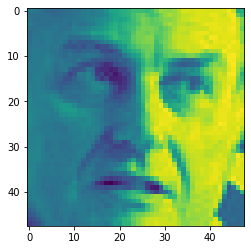

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img("/content/AI/test/sad/PrivateTest_10247676.jpg",target_size=(48,48),color_mode="grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)
img = img.reshape(1,48,48,1)
saved_model = load_model("ANNmodelfinal.h5")
result = saved_model.predict(img)
result=list(result[0])
    
img_index = result.index(max(result))
print(img_index)
print(opDict[img_index])
plt.show()

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}


In [ ]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model_ann.predict(img)
result = list(result[0])
print(result)


In [ ]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()